In [28]:
from utils import collect_data, format_data
import matplotlib.pyplot as plt
from PIL import Image

In [29]:

dataset = collect_data()
print(dataset)


Dataset({
    features: ['image', 'title', 'essay', 'source', 'filename'],
    num_rows: 3476
})


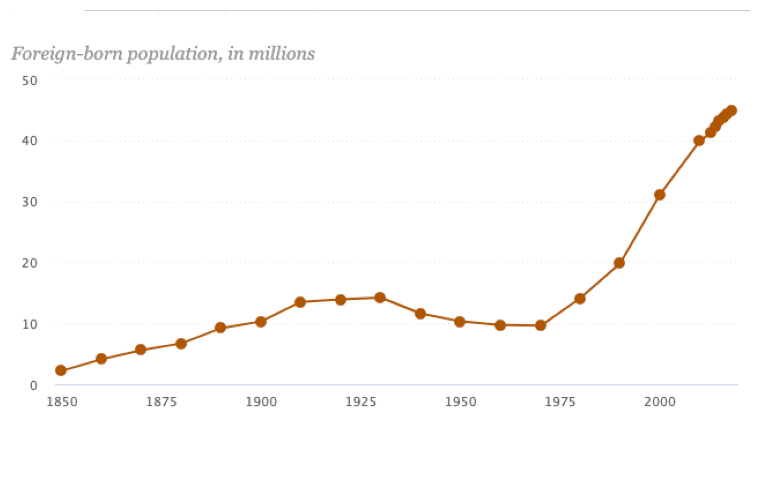

In [30]:
image = dataset[0]['image']

plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [31]:
print(dataset[0]['title'])

Foreign-born population in the United States, 1850-2018


In [32]:
print(dataset[0]['essay'])

1. <Describe a graph:>
"The graph illustrates the changes in the foreign-born population in the United States from 1850 to 2018."

2. <Find the key points and trends:>

Paragraph 1:
"In 1850, the foreign-born population in the United States was approximately 2.2 million. This number gradually increased to around 14 million by 1930. However, the population saw a decline during the subsequent decades, reaching a low of about 10 million in 1970."

Paragraph 2:
"Since 1970, there has been a significant upward trend in the foreign-born population. By 2000, the population had risen to approximately 31 million, and it continued to grow rapidly, reaching an estimated 45 million by 2018."

3. <Write a summary of presented data:>
"Overall, the foreign-born population in the United States has experienced substantial growth over the past century and a half, with a notable increase in recent decades. The population has more than tripled since 1970, reflecting significant changes in immigration patt

## Division of data

In [33]:
first_split = dataset.train_test_split(test_size=0.2, seed=42)
test_dataset = first_split['test']
temp_train = first_split['train']

In [34]:
second_split = temp_train.train_test_split(test_size=0.125, seed=42)
train_dataset = second_split['train']
validation_dataset = second_split['test']


In [35]:
total_size = len(dataset)
print(f"Total dataset size: {total_size}")
print(f"Train size: {len(train_dataset)} ({len(train_dataset)/total_size:.1%})")
print(f"Validation size: {len(validation_dataset)} ({len(validation_dataset)/total_size:.1%})")
print(f"Test size: {len(test_dataset)} ({len(test_dataset)/total_size:.1%})")

Total dataset size: 3476
Train size: 2432 (70.0%)
Validation size: 348 (10.0%)
Test size: 696 (20.0%)


### Data formatting for SmolVLM

In [36]:
train_dataset = [format_data(sample) for sample in train_dataset]
eval_dataset = [format_data(sample) for sample in validation_dataset]
test_dataset = [format_data(sample) for sample in test_dataset]

In [37]:
train_dataset[111]

[{'role': 'system',
  'content': [{'type': 'text',
    'text': 'You are a Vision Language Model specialized in interpreting visual data from chart images.\nYour task is to analyze the provided chart image and title, then respond with IELTS Band 9 essay about the data.\nYou use sofisticated vocabulary and correct grammar, moreover you use synonyms and you do not repeat words.'}]},
 {'role': 'user',
  'content': [{'type': 'image',
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x557>},
   {'type': 'text',
    'text': 'When buying homeware or DIY products , which of the following do you often do ? \n'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '1. <Describe a graph>:\n"The bar chart illustrates the expenditure of France and the UK on five consumer goods (cars, computers, books, perfume, and cameras) in 2010, measured in pounds sterling."\n\n2. <Find the key points, trends and compare data>:\n\nParagraph 1:\n"In terms of expenditure on cars,